In [1]:
import pandas as pd
import numpy as np

In [41]:
predicted_alphas = pd.read_csv('predicted_alpha_values.csv', index_col=0)['alpha_x']
original_alphas = pd.read_csv('tangent_alpha_values.csv', index_col=0)['alpha_x']
risk_free_rates = pd.read_csv('coefficients.csv', index_col=0)['risk_free_rate']
alphas = pd.merge(predicted_alphas, original_alphas, on='date', suffixes=('_predicted', '_original'))

In [42]:
alphas.head()

,alpha_x_predicted,alpha_x_original
date,,
2019-02-28,0.218311,0.218944
2019-03-31,0.526030,0.571051
2019-04-30,0.645103,0.396042
2019-05-31,0.441055,0.581447
2019-06-30,0.820542,0.919777


In [28]:
returns = pd.read_csv('returns.csv', index_col=0)
weights = pd.read_csv('weights.csv', index_col=0)
print(returns.head())
print(weights.head())

                ARKK       TLT     ^GSPC
2019-02-28  0.117083 -0.000986  0.053195
2019-03-31  0.003651  0.055717  0.017924
2019-04-30 -0.004428 -0.005789  0.027428
2019-05-31 -0.137442  0.068392 -0.065778
2019-06-30  0.147572  0.022140  0.054825
               ^GSPC           TLT          ARKK
2019-01-31  1.000000 -2.891829e-08  2.395681e-08
2019-02-28  1.000000  9.891161e-08  1.191396e-08
2019-03-31  0.378843  6.211566e-01  0.000000e+00
2019-04-30  0.535573  4.644267e-01  0.000000e+00
2019-05-31  0.187573  8.124273e-01  0.000000e+00


Original endowment: 1066185990.1678804
Predicted endowment: 1071671164.9173223


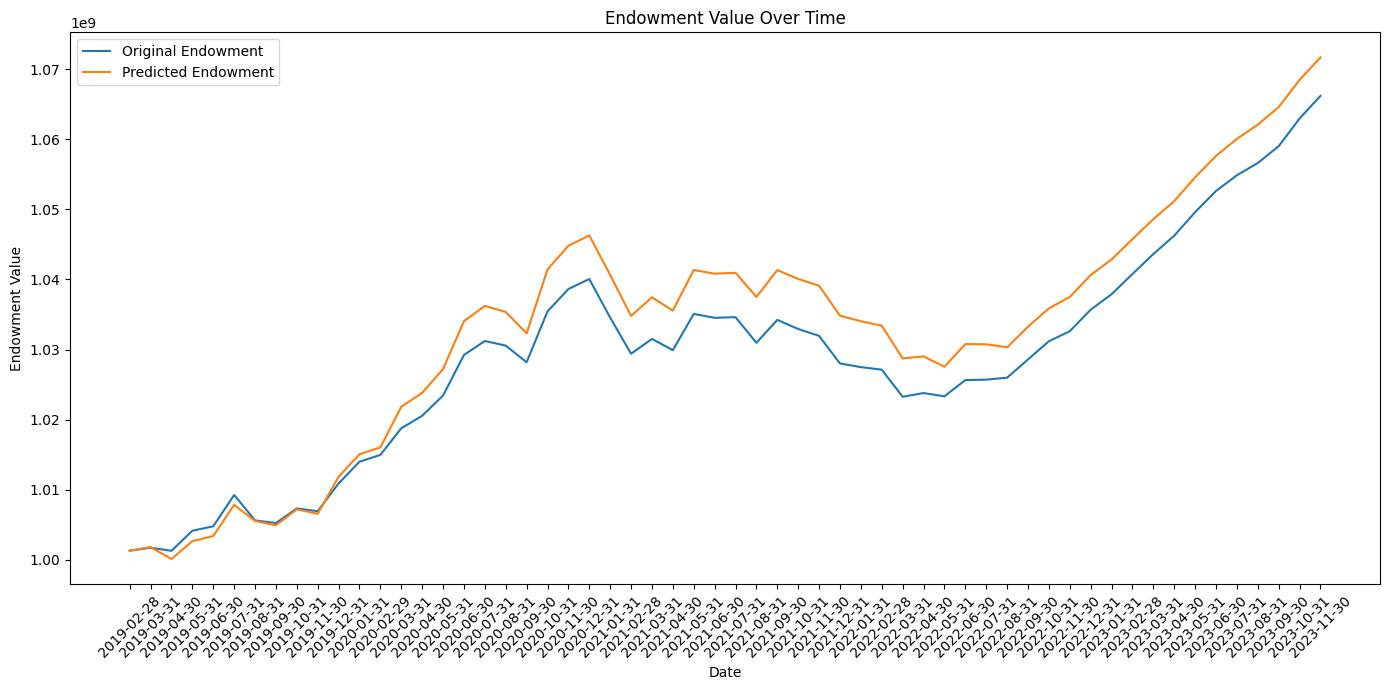

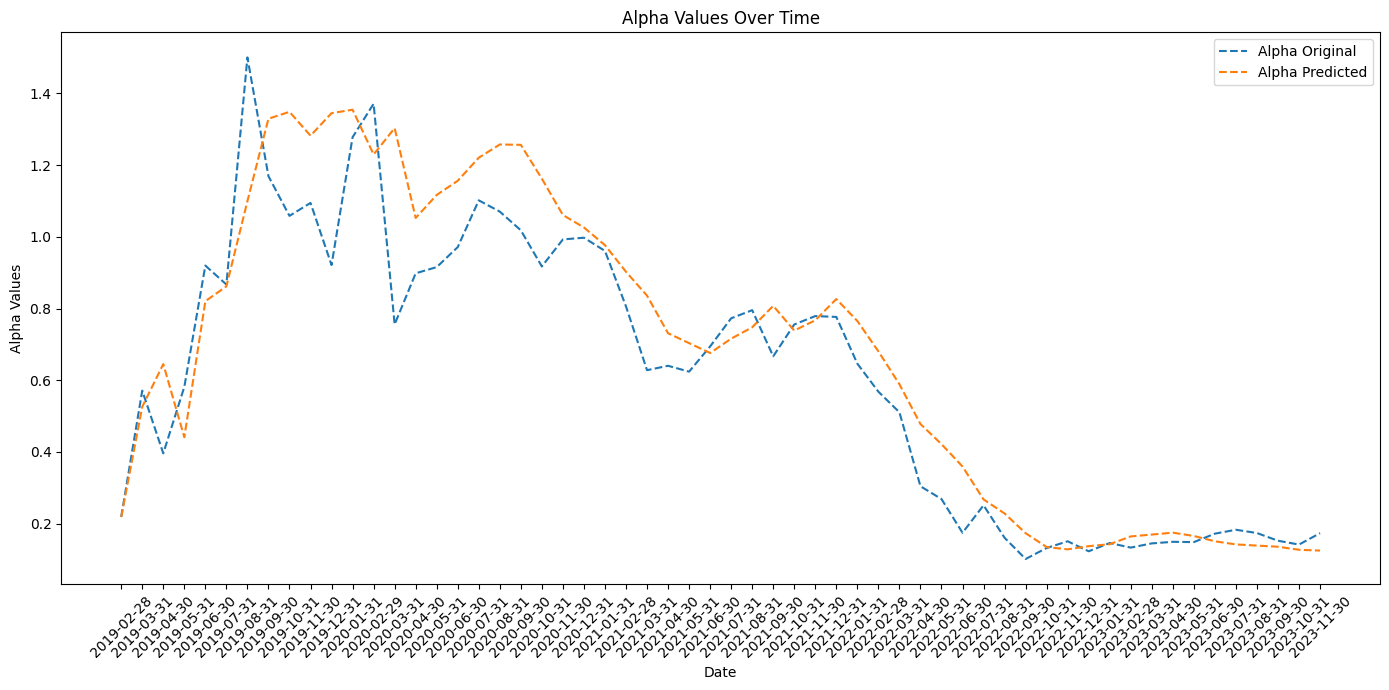

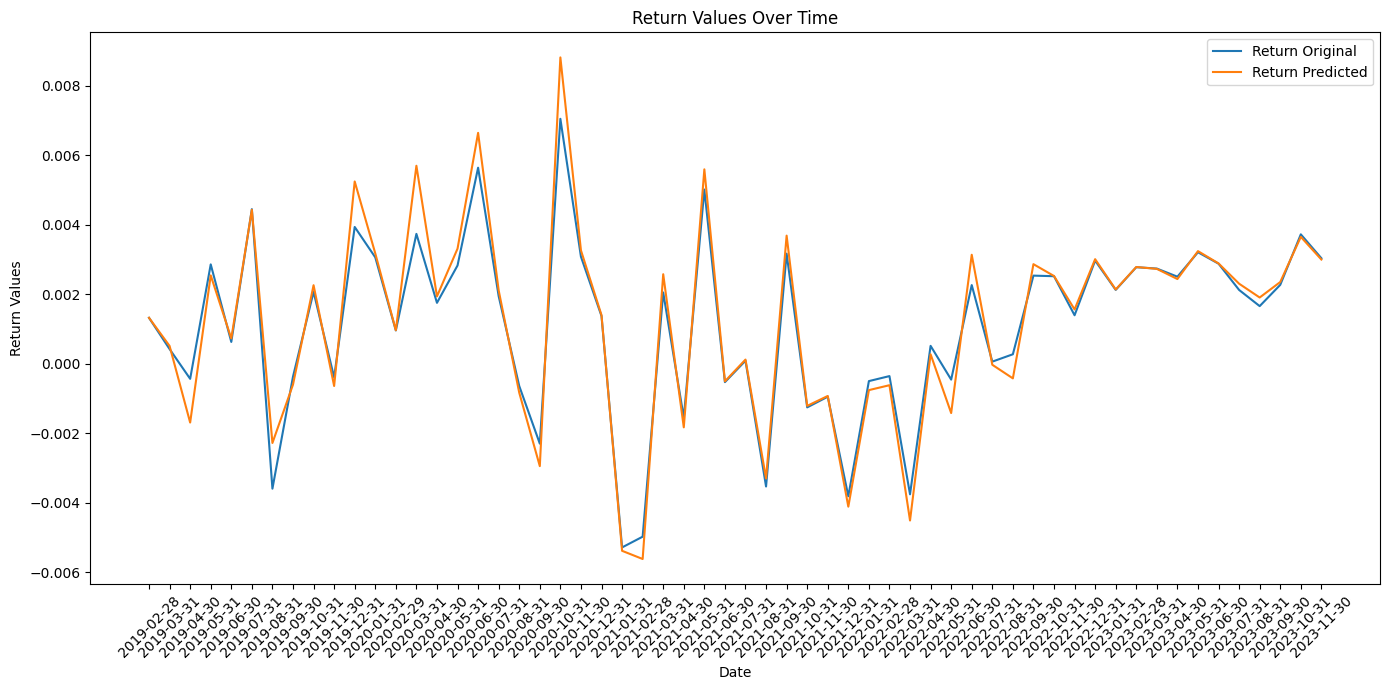

In [50]:
# Initialize endowments
endowment_original, endowment_predicted = 1000000000, 1000000000

# Lists to store endowment values over time for plotting
dates = []
endowment_values_original = []
endowment_values_predicted = []

# Lists to store alpha and return values for plotting
alpha_values_original = []
alpha_values_predicted = []
return_values_original = []
return_values_predicted = []

# Loop through the date range
for i in range(len(pd.date_range("2019-02-28", "2023-12-31", freq="ME")) - 1):
    date = pd.date_range("2019-02-28", "2023-12-31", freq="ME")[i]
    next_month = pd.date_range("2019-02-28", "2023-12-31", freq="ME")[i + 1]

    date_str = date.strftime('%Y-%m-%d')
    dates.append(date_str)

    next_month_str = next_month.strftime('%Y-%m-%d')
    
    return_p = np.dot(weights.loc[date_str], returns.loc[next_month_str] / 12)
    risk_free_rate = risk_free_rates.loc[date_str] / 12
    
    original_alpha = alphas.loc[date_str]["alpha_x_original"]
    return_original = original_alpha * return_p + (1 - original_alpha) * risk_free_rate

    predicted_alpha = alphas.loc[date_str]["alpha_x_predicted"]
    return_predicted = predicted_alpha * return_p + (1 - predicted_alpha) * risk_free_rate
    
    endowment_original *= 1 + return_original
    endowment_predicted *= 1 + return_predicted
    
    # Store the endowment values for plotting
    endowment_values_original.append(endowment_original)
    endowment_values_predicted.append(endowment_predicted)
    
    # Store the alpha and return values for plotting
    alpha_values_original.append(original_alpha)
    alpha_values_predicted.append(predicted_alpha)
    return_values_original.append(return_original)
    return_values_predicted.append(return_predicted)

# Final results
print(f"Original endowment: {endowment_original}")
print(f"Predicted endowment: {endowment_predicted}")

# Plotting Endowment Values
plt.figure(figsize=(14, 7))
plt.plot(dates, endowment_values_original, label='Original Endowment')
plt.plot(dates, endowment_values_predicted, label='Predicted Endowment')
plt.xlabel('Date')
plt.ylabel('Endowment Value')
plt.title('Endowment Value Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Alpha Values
plt.figure(figsize=(14, 7))
plt.plot(dates, alpha_values_original, label='Alpha Original', linestyle='--')
plt.plot(dates, alpha_values_predicted, label='Alpha Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Alpha Values')
plt.title('Alpha Values Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Return Values
plt.figure(figsize=(14, 7))
plt.plot(dates, return_values_original, label='Return Original')
plt.plot(dates, return_values_predicted, label='Return Predicted')
plt.xlabel('Date')
plt.ylabel('Return Values')
plt.title('Return Values Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()